# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#%pip install pandas_datareader

In [1]:
from datafromsource import DataFromSource

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web
import datetime as dt

In [11]:
portfolio = ["AAPL.N", 
             "TSLA.O", 
             "GOOGL.O", 
             'MSFT.O',
             'PPG.N',
             'CX.N',
             'GM.N']

In [12]:
from portfoliodata import PortfolioData
portfolio = PortfolioData(portfolio, interval_period="1W", initial = 365*5)
weekly_returns = portfolio.get_portfolio_returns()


AAPL.N
TSLA.O
GOOGL.O
MSFT.O
PPG.N
CX.N
GM.N


In [13]:
weekly_returns

,AAPL.N,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
Date,,,,,,,
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-11,-0.075999,-0.115419,-0.042273,-0.048877,0.035966,0.175485,0.015217
2020-09-18,-0.050599,0.170822,-0.043602,-0.018002,-0.010519,0.010499,0.033573
2020-09-25,0.052381,-0.082001,-0.008325,0.036407,-0.044882,-0.064713,-0.082692
2020-10-02,0.006127,0.018847,0.011428,-0.007874,0.024804,0.048923,0.049119
...,...,...,...,...,...,...,...
2025-08-01,-0.056040,-0.043421,-0.021188,0.020043,-0.104546,-0.001190,-0.016426
2025-08-08,0.125525,0.085521,0.062958,-0.003957,0.023749,0.025853,0.018858
2025-08-15,0.009914,0.002757,0.012237,-0.003589,0.044350,-0.010496,0.050630


In [14]:
# Se identifican activos que no tengan la historia de rendimientos completa
s = weekly_returns.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in weekly_returns: 
   if s[col] >= 2:  
       del weekly_returns[col]

In [15]:
weekly_returns = weekly_returns.dropna()
weekly_returns

,AAPL.N,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
Date,,,,,,,
2020-09-11,-0.075999,-0.115419,-0.042273,-0.048877,0.035966,0.175485,0.015217
2020-09-18,-0.050599,0.170822,-0.043602,-0.018002,-0.010519,0.010499,0.033573
2020-09-25,0.052381,-0.082001,-0.008325,0.036407,-0.044882,-0.064713,-0.082692
2020-10-02,0.006127,0.018847,0.011428,-0.007874,0.024804,0.048923,0.049119
2020-10-09,0.034539,0.044549,0.036989,0.045600,0.097395,0.071642,0.054309
...,...,...,...,...,...,...,...
2025-08-01,-0.056040,-0.043421,-0.021188,0.020043,-0.104546,-0.001190,-0.016426
2025-08-08,0.125525,0.085521,0.062958,-0.003957,0.023749,0.025853,0.018858
2025-08-15,0.009914,0.002757,0.012237,-0.003589,0.044350,-0.010496,0.050630


In [16]:
weekly_returns.shape


(260, 7)

# Set Parameters

In [17]:
weekly_returns.columns

Index(['AAPL.N', 'TSLA.O', 'GOOGL.O', 'MSFT.O', 'PPG.N', 'CX.N', 'GM.N'], dtype='object')

In [28]:
#.4'GOLD.N', .2'TSLA.O', .1'GOOGL.O', .05'MSFT.O', .05'PPG.N', .02'CX.N', .18'GM.N'

In [19]:
stocks = weekly_returns.columns


In [20]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(7, 260)

In [21]:
NUM_PF = 100000 # no of portfolios to simulate


In [22]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([0.18150343, 0.12194525, 0.12746487, 0.12753211, 0.1133995 ,
       0.20275619, 0.12539866])

# Annualization Factor


In [23]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

43

# Compute Mean Returns, Covariance and Precision Matrix


In [24]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,AAPL.N,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
AAPL.N,0.001478,0.001411,0.000924,0.000775,0.000560,0.000521,0.000617
TSLA.O,0.001411,0.006918,0.001305,0.001180,0.000793,0.000887,0.001691
GOOGL.O,0.000924,0.001305,0.001768,0.000890,0.000486,0.000607,0.000598
MSFT.O,0.000775,0.001180,0.000890,0.001141,0.000501,0.000434,0.000445
PPG.N,0.000560,0.000793,0.000486,0.000501,0.001310,0.001021,0.000864
CX.N,0.000521,0.000887,0.000607,0.000434,0.001021,0.003681,0.001364
GM.N,0.000617,0.001691,0.000598,0.000445,0.000864,0.001364,0.002608


In [25]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,AAPL.N,TSLA.O,GOOGL.O,MSFT.O,PPG.N,CX.N,GM.N
AAPL.N,1274.125560,-98.995563,-321.849691,-418.822335,-191.090784,11.952689,-34.651587
TSLA.O,-98.995563,207.781350,-26.163098,-102.107993,23.282531,11.428103,-101.525612
GOOGL.O,-321.849691,-26.163098,1055.606500,-561.218700,44.349111,-53.780693,-39.907806
MSFT.O,-418.822335,-102.107993,-561.218700,1800.612125,-307.057389,20.893414,77.324392
PPG.N,-191.090784,23.282531,44.349111,-307.057389,1248.887819,-210.403733,-231.331823
CX.N,11.952689,11.428103,-53.780693,20.893414,-210.403733,380.387999,-130.707325
GM.N,-34.651587,-101.525612,-39.907806,77.324392,-231.331823,-130.707325,598.358428


# Risk-Free Rate

In [31]:
today = dt.date.today()
initial_day = today - dt.timedelta(days=365*5)

In [32]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', initial_day, today)
                         .resample('ME')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [33]:
treasury_10yr_monthly

DATE
2020-09-30    0.000160
2020-10-31    0.000205
2020-11-30    0.000195
2020-12-31    0.000216
2021-01-31    0.000258
                ...   
2025-05-31    0.001026
2025-06-30    0.000986
2025-07-31    0.001016
2025-08-31    0.000984
2025-09-30    0.000995
Freq: ME, Name: DGS10, Length: 61, dtype: float64

In [35]:
rf_rate = 0.000995


# Simualate Random Portfolios

In [36]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [38]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [39]:
simul_perf

,Annualized Standard Deviation,Annualized Returns,Sharpe Ratio
0,0.251270,0.113854,0.449154
1,0.353950,0.176042,0.494551
2,0.238056,0.115351,0.480373
3,0.220743,0.152277,0.685332
4,0.322461,0.118014,0.362893
...,...,...,...
99995,0.229639,0.092327,0.397722
99996,0.397184,0.189197,0.473842
99997,0.235233,-0.005767,-0.028747
99998,0.503629,0.157864,0.311477


In [40]:
simul_wt

array([[9.94069808e-01, 7.23489849e-23, 3.16273320e-08, ...,
        4.31331769e-17, 3.24156864e-09, 5.91659237e-03],
       [2.77739092e-02, 3.88945124e-07, 6.50448302e-04, ...,
        1.10554756e-04, 8.22441464e-01, 1.49023188e-01],
       [5.10438754e-01, 1.13673069e-04, 3.08041289e-12, ...,
        3.45666063e-18, 4.84605750e-22, 4.89168909e-01],
       ...,
       [1.29228904e-19, 7.45668674e-13, 3.55753398e-15, ...,
        9.45597722e-01, 5.44022775e-02, 2.66863042e-11],
       [2.77333872e-03, 9.09358095e-01, 3.27491466e-03, ...,
        7.79234812e-05, 8.45155675e-02, 6.78341424e-20],
       [2.70554088e-04, 5.07470612e-12, 1.24669545e-20, ...,
        7.92822259e-01, 2.06899281e-01, 7.89731617e-06]])

In [41]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,1.416119e-01,1.430737e-01,1.416522e-01,1.420459e-01,1.423741e-01,1.448447e-01,1.443976e-01
std,2.996370e-01,3.015703e-01,2.997939e-01,3.002206e-01,3.004849e-01,3.025257e-01,3.024064e-01
min,1.492905e-103,5.379933e-105,4.373569e-107,7.100371e-95,1.690643e-131,3.925575e-107,9.806407e-122
25%,1.219524e-11,1.221000e-11,1.361116e-11,1.303573e-11,1.419480e-11,1.727670e-11,1.519713e-11
50%,1.313452e-05,1.425473e-05,1.320302e-05,1.364644e-05,1.447115e-05,1.625885e-05,1.438092e-05
75%,4.423494e-02,4.514473e-02,4.316104e-02,4.466417e-02,4.399297e-02,4.939614e-02,4.814083e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Plot Simulated Portfolios

Max Sharpe: 20.84%, 16.67%


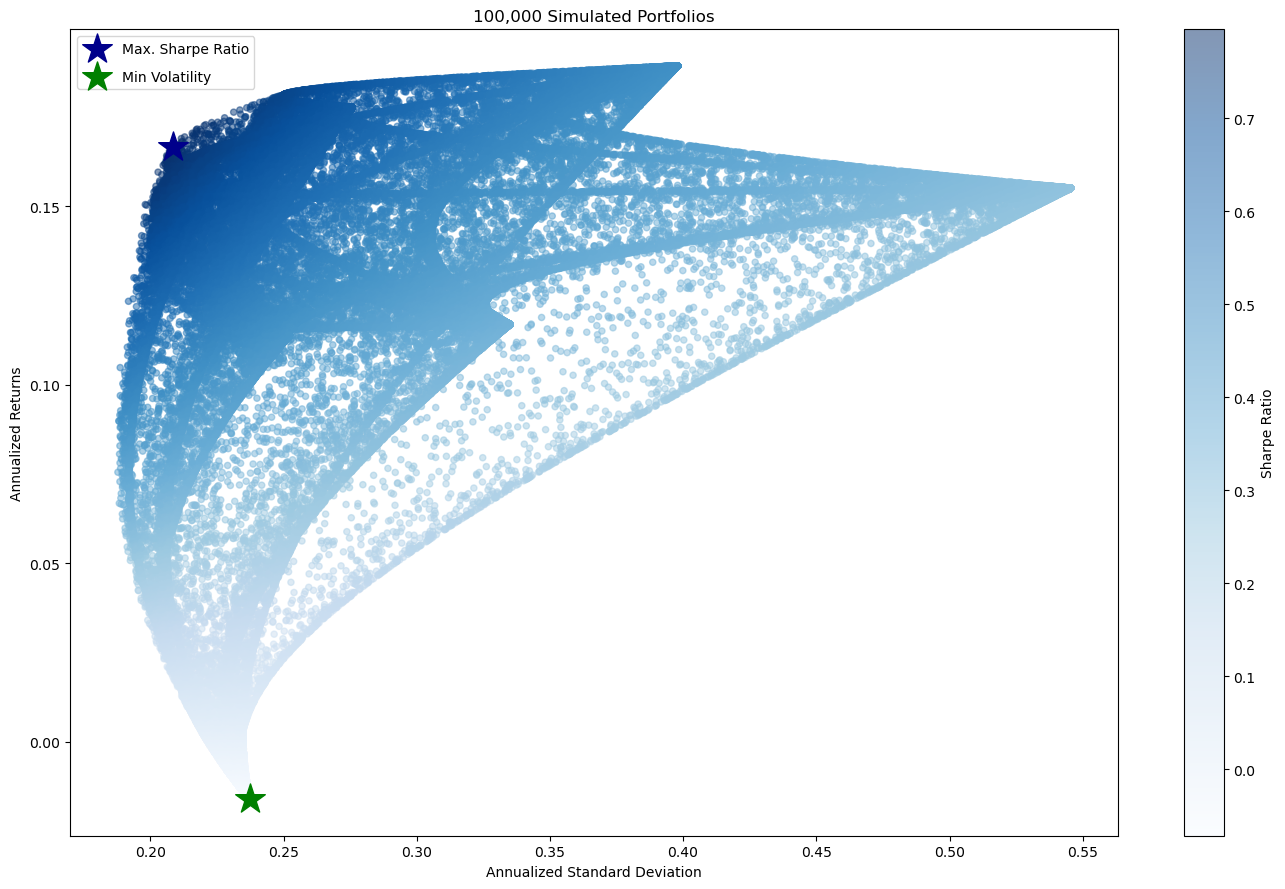

In [42]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance



Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:

In [43]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [44]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [45]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF

Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [46]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [47]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [56]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':10000})

# Compute Efficient Frontier

In [60]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 10000})

# Min Volatility Portfolio

In [61]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 10000})

In [51]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]

## Run Calculation

## Get random PF

In [52]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)


In [53]:
print(simul_perf.describe())


       Annualized Standard Deviation  Annualized Returns   Sharpe Ratio
count                  100000.000000       100000.000000  100000.000000
mean                        0.299688            0.126281       0.430352
std                         0.093073            0.055542       0.211997
min                         0.186674           -0.015984      -0.071551
25%                         0.233278            0.114331       0.320835
50%                         0.263628            0.144648       0.458412
75%                         0.334884            0.162200       0.624202
max                         0.545394            0.189285       0.794639


In [54]:
simul_max_sharpe = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.208005
Annualized Returns               0.166284
Sharpe Ratio                     0.794639
Name: 23281, dtype: float64

# Get Max Sharpe PF

In [57]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [58]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.166394
sd     0.207891
sr     0.795603
dtype: float64

# Get Min Vol PF

In [62]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [63]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

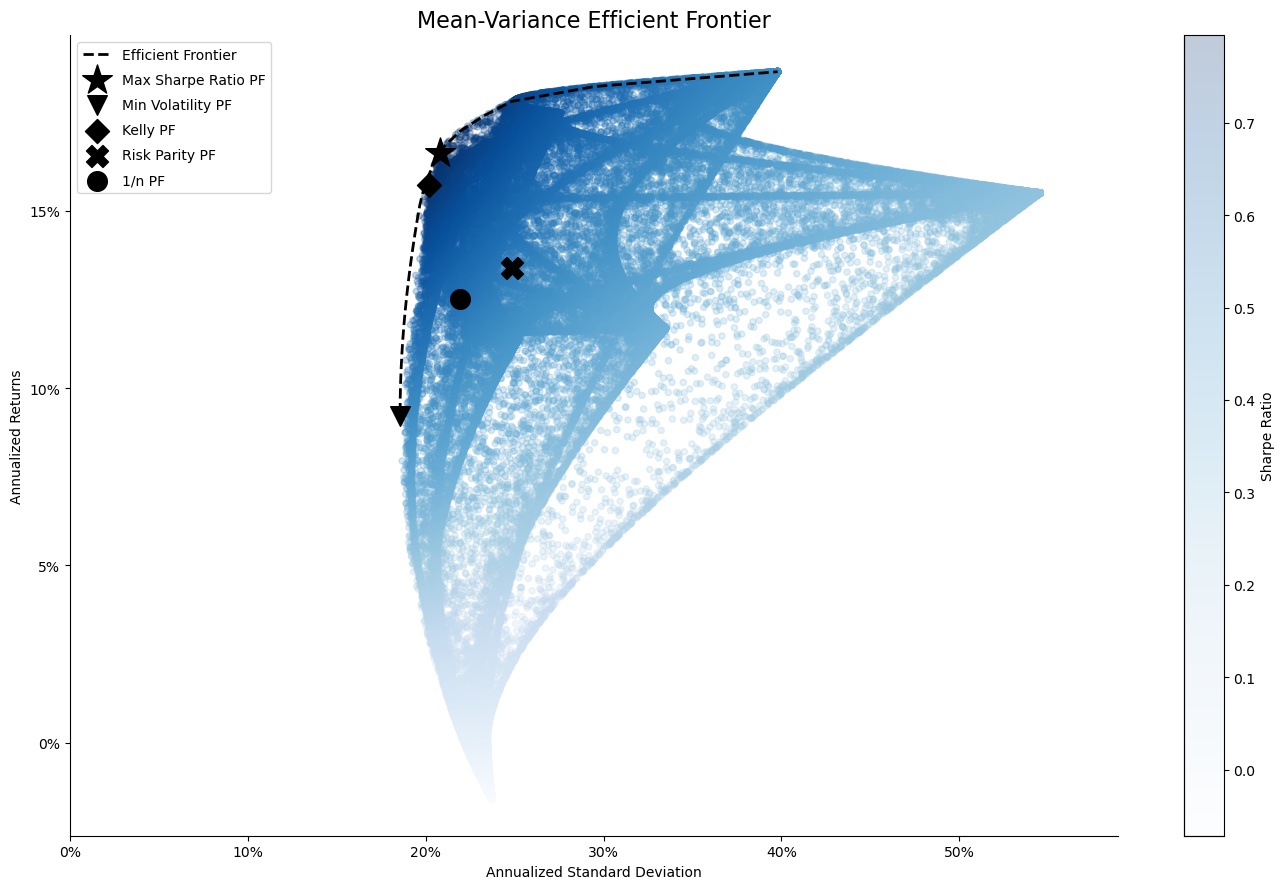

In [64]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [65]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [66]:
kelly_wt

array([0.04707801, 0.        , 0.1545303 , 0.46887829, 0.        ,
       0.20094993, 0.12856346])

In [67]:
['GOLD.N', 'TSLA.O', 'GOOGL.O', 'MSFT.O', 'PPG.N', 'CX.N', 'GM.N']

['GOLD.N', 'TSLA.O', 'GOOGL.O', 'MSFT.O', 'PPG.N', 'CX.N', 'GM.N']

In [68]:
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)


In [69]:
print(r, sd)

0.15723907588001973 0.20205705754207842


In [70]:
max_sharpe_pf['x']


array([2.46461817e-16, 3.12476855e-17, 2.77165746e-01, 5.10504043e-01,
       5.86250778e-16, 2.00048122e-01, 1.22820890e-02])

In [71]:
max_sharpe_pf


     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -0.7956025443567061
           x: [ 2.465e-16  3.125e-17  2.772e-01  5.105e-01  5.863e-16
                2.000e-01  1.228e-02]
         nit: 6
         jac: [ 7.863e-04  1.126e-01 -6.643e-02 -6.643e-02  5.693e-01
               -6.639e-02 -6.626e-02]
        nfev: 48
        njev: 6
 multipliers: [-6.639e-02]